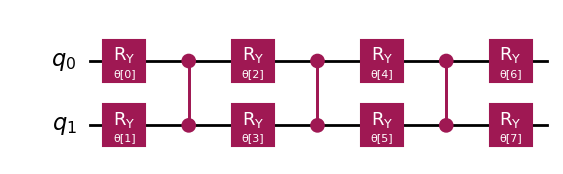

In [33]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, "ry", "cz")
optimizer = SLSQP(maxiter=1000)

from qiskit.primitives import Estimator
estimator = Estimator()

from qiskit.algorithms.minimum_eigensolvers import VQE
vqe = VQE(estimator, ansatz, optimizer)

ansatz.decompose().draw("mpl", style="iqx")

$$H = \omega_1 S_1^z + \omega_2 S_2^z + \frac{A}{2} S_1^x S_2^x + \frac{A}{2} S_1^y S_2^y$$

In [34]:
from qiskit.quantum_info import SparsePauliOp

# define operator
H_op = lambda omega_1, omega_2, A: SparsePauliOp.from_list([
    ("IZ", omega_1),
    ("ZI", omega_2),
    ("XX", A/2),
    ("YY", A/2),
])

# test with one method
result = vqe.compute_minimum_eigenvalue(H_op(1, 1, 1))
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 58,
    'eigenvalue': -1.999999999999308,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000001CDFF529120>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 5.6426780073736005,
                              ParameterVectorElement(θ[5]): 5.357276641811626,
                              ParameterVectorElement(θ[2]): -0.8436815213905924,
                              ParameterVectorElement(θ[3]): -4.479245674334925,
                              ParameterVectorElement(θ[4]): 0.23188179895496414,
                              ParameterVectorElement(θ[7]): 5.332017313470946,
                              ParameterVectorElement(θ[1]): -3.0717816801012745,
                              ParameterVectorElement(θ[6]): -2.9150420875235064},
    'optimal_point': array([ 5.64267801, -3.07178168, -0.84368152, -4.47924567,  0.2318818 ,
        5.35727664, -2.91504209,  5.33201731]),
    '

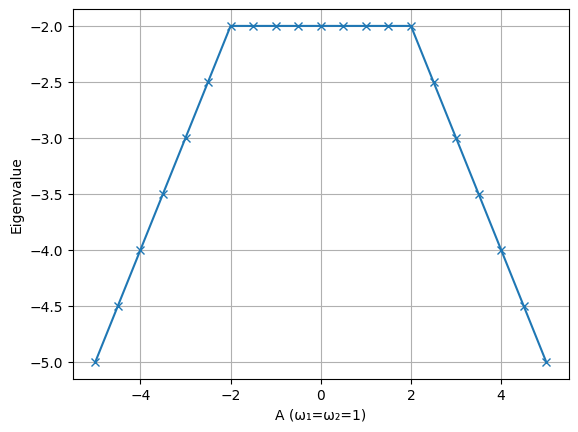

In [35]:
# investigate for different A values

As = np.linspace(-5, 5, 21)
Eigs = np.array([
    vqe.compute_minimum_eigenvalue(H_op(1, 1, A)).eigenvalue for A in As
])
plt.plot(As, Eigs, marker="x")
plt.grid()
plt.xlabel("A (ω₁=ω₂=1)")
plt.ylabel("Eigenvalue")
plt.show()

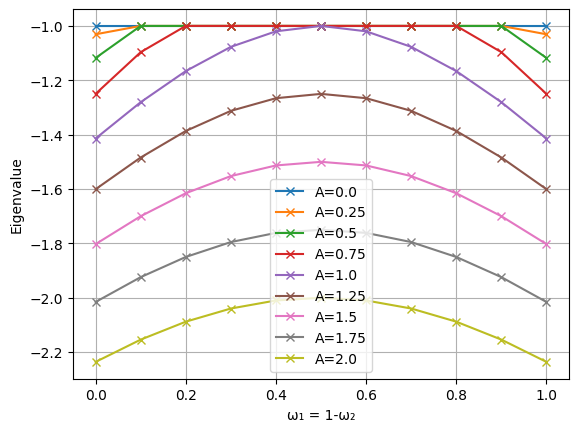

In [41]:
# investigate for different ω₁/ω₂ ratios

As = np.linspace(0, 2, 9)
ratio = np.linspace(0, 1, 11)

for A in As:
    Eigs = np.array([
        vqe.compute_minimum_eigenvalue(H_op(r, 1-r, A)).eigenvalue for r in ratio
    ])
    plt.plot(ratio, Eigs, marker="x", label=f"A={A}")

plt.grid()
plt.xlabel("ω₁ = 1-ω₂")
plt.ylabel("Eigenvalue")
plt.legend()
plt.show()

In [ ]:
from qiskit.algorithms.optimizers import SPSA

# test with shots method
estimator = Estimator(options={"shots": 1000})
vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H_op(1, 1, 1))
print(result)